## Interacting with the deployed Contracts on the Hardhat environment

In [1]:
#Run the node.
#in new tab run contract
#npx hardhat run --network localhost scripts/deploy.js

In [2]:
# Importing libraries
from web3 import Web3
import json

#### Connecting to Hardhat environment. <br> <i>Note: Make sure environment is up and running </i>

In [3]:
# Started HTTP and WebSocket JSON-RPC server at ...
HTTP_Server = 'http://127.0.0.1:8545'

In [4]:
# Checking the web3 connection
web3 = Web3(Web3.HTTPProvider(HTTP_Server))
print("isConnected:",web3.is_connected())

isConnected: True


#### Getting the list of accounts

| Role   	| Size 	| index 	| :index 	|
|--------	|------	|-------	|--------	|
| Admins 	| 5    	| 0     	| 4      	|
| Car    	| 3000 	| 5     	| 3004   	|
| Busses 	| 200  	| 3005  	| 3204   	|
| Truck  	| 45   	| 3205  	| 3249   	|

Generated total: 3250 Wallets

In [5]:
# Asserting that we have correct number of accounts
accounts_list = web3.eth.accounts

assert(len(accounts_list) == 3250)

In [6]:
#getting the lists of accounts available, Account[0] will be like an auditor account

#accounts_list[0]: Contract_Owner
Contract_Owner = accounts_list[0]
#accounts_list[1]: electric_Station
electric_Station = accounts_list[1]
#accounts_list[2]: water_Station
water_Station = accounts_list[2]
#accounts_list[3]: hydrogen_Station
hydrogen_Station = accounts_list[3]
#accounts_list[4]: filling_Station
filling_Station = accounts_list[4]


print(f'''
Contract_Owner: {Contract_Owner}
electric_Station: {electric_Station}
water_Station: {water_Station}
hydrogen_Station: {hydrogen_Station}
filling_Station: {filling_Station}
''')


Contract_Owner: 0xf39Fd6e51aad88F6F4ce6aB8827279cffFb92266
electric_Station: 0x70997970C51812dc3A010C7d01b50e0d17dc79C8
water_Station: 0x3C44CdDdB6a900fa2b585dd299e03d12FA4293BC
hydrogen_Station: 0x90F79bf6EB2c4f870365E785982E1f101E93b906
filling_Station: 0x15d34AAf54267DB7D7c367839AAf71A00a2C6A65



In [7]:
# storing Cars' address in a list
car_Addresses = []
for i in range(5,3005):
    car_Addresses.append(accounts_list[i])

assert(len(car_Addresses)==3000)

In [8]:
# storing Busses address in a list
bus_Addresses = []
for i in range(3005,3205):
    bus_Addresses.append(accounts_list[i])

assert(len(bus_Addresses)==200)

In [9]:
# storing Truck address in a list
truck_Addresses = []
for i in range(3205,3250):
    truck_Addresses.append(accounts_list[i])

assert(len(truck_Addresses)==45)

In [10]:
# creating instance of the the smart contract
# Getting ABI
with open('artifacts/contracts/HydrogenProductions.sol/SUPPLYHYDROGEN.json') as f:
    contract_abi = json.load(f)['abi']

In [11]:
#getting Deployed Address... NOTE THIS MIGHT CHANGE, SO MAKE SURE YOU ARE RUNNING CORRECT ADDRESS
contract_address = '0x5FbDB2315678afecb367f032d93F642f64180aa3'

In [12]:
#Instance of the contract
h2p_contract = web3.eth.contract(address=contract_address, abi = contract_abi)

In [13]:
#Production Phase

In [14]:
indexWATER = h2p_contract.functions.WATER().call();
indexRENEWABLES = h2p_contract.functions.RENEWABLES().call();
indexHYDROGEN_FUEL = h2p_contract.functions.HYDROGEN_FUEL().call();

assert(indexWATER == 0)
assert(indexRENEWABLES == 1)
assert(indexHYDROGEN_FUEL == 2)

In [15]:
# Requirements
waterRequired = 24850 * 109106;
energyRequired = 24850 * 550000;


In [16]:
# Creating empty list for gas appending

In [17]:
def gas_consumption(**kwargs):    
    if kwargs['solo'] == True:
        transaction_hash = kwargs['transaction']
        receipt = web3.eth.wait_for_transaction_receipt(transaction_hash).gasUsed
        return receipt

    else:
        transaction_hash = kwargs['transaction']
        receipt = web3.eth.wait_for_transaction_receipt(transaction_hash).gasUsed
        return receipt



In [18]:
# Getting Contract address


In [19]:
#  Authorising
_ = h2p_contract.functions.setWaterProvider(water_Station).transact({'from':Contract_Owner }).hex()
print(_)
gas_ = gas_consumption(transaction = _, solo = False)
print("Water Authorization", gas_)

_ = h2p_contract.functions.setEnergyProvider(electric_Station).transact({'from':Contract_Owner }).hex()
print(_)
gas_ = gas_consumption(transaction = _, solo = False)
print("GRID Authorization", gas_)


_ = h2p_contract.functions.setFuelProvider(hydrogen_Station).transact({'from':Contract_Owner }).hex()
print(_)
gas_ = gas_consumption(transaction = _, solo = False)
print("Electrolysis Authorization", gas_)

0xabed1fa8aaf3f252c64bd6dcab2133a232fc9be4e2920d8b3248bdf53a45533b
Water Authorization 46430
0x0f13d7bb558544a097f54fd4e50e7f274f36e393d03a9f476d3ba5c6b78818a1
GRID Authorization 46399
0xb44692ce01915ce9a9967f9e1a445fd203df0443313d4b2f6c86ec7dc8961035
Electrolysis Authorization 46444


In [20]:
# Minting Water and Electricity
_ = h2p_contract.functions.mintWater(waterRequired).transact({'from':water_Station }).hex()
print(_)
gas_water_minting = gas_consumption(transaction = _, solo = False)
print('gas_water_minting',gas_water_minting)



0x27d4dd8eb673da0c64eb1aff0f91e6204028f50357196931eb38f5a69183bab8
gas_water_minting 50196


In [21]:
_ = h2p_contract.functions.mintEnergy(energyRequired).transact({'from':electric_Station }).hex()
print(_)
gas_electricity_minting = gas_consumption(transaction = _, solo = False)
print('gas_electricity_minting',gas_electricity_minting)

0x36677b4b40155275dfc62374b88f91f09f9edf19e77b94523ed8c0ed8b7770d2
gas_electricity_minting 50186


In [22]:
#Transfering Resources to H2 Plant: Water
_ = h2p_contract.functions.safeTransferFrom(water_Station,hydrogen_Station, indexWATER, waterRequired, '0x0000000000000000000000000000000000000000000000000000000000000000').transact({'from':water_Station })
print(_.hex())
gas_water_safeTransferFrom = gas_consumption(transaction = _, solo = False)
print('gas_water_safeTransferFrom',gas_water_safeTransferFrom)

0xa410945d5d370ee5faf76d1a38260bcace0b760d1a31c8c2b161e73f84572924
gas_water_safeTransferFrom 53714


In [23]:
#Transfering Resources to H2 Plant: Electricity
_ = h2p_contract.functions.safeTransferFrom(electric_Station,hydrogen_Station, indexRENEWABLES, energyRequired, '0x0000000000000000000000000000000000000000000000000000000000000000').transact({'from':electric_Station })
print(_.hex())
gas_electricity_safeTransferFrom = gas_consumption(transaction = _, solo = False)
print('gas_electricity_safeTransferFrom',gas_electricity_safeTransferFrom)

0xe6e1a689e602238ebefc6020e30bfaba2e78379fc6e200465118485f4bf76300
gas_electricity_safeTransferFrom 53750


In [24]:
# minting and buring.
_ = h2p_contract.functions.mintHydrogen().transact({'from':hydrogen_Station })
print(_.hex())
gas_hydrogen_mint = gas_consumption(transaction = _, solo = False)
print('gas_hydrogen_mint',gas_hydrogen_mint)

0xe074ffe09e353adf5b68d801568683dbce3b51ca24dc9f19ef05033e9ac19168
gas_hydrogen_mint 72323


In [25]:
# Transfering to Filling Station
# Getting Balance of H2 at hydrogen_Station

h2_balance = h2p_contract.functions.balanceOf(hydrogen_Station,indexHYDROGEN_FUEL).call()

_ = h2p_contract.functions.safeTransferFrom(hydrogen_Station,filling_Station, indexHYDROGEN_FUEL, h2_balance, '0x0000000000000000000000000000000000000000000000000000000000000000').transact({'from':hydrogen_Station })

print(_.hex())
gas_hydrogen_safeTransferFrom = gas_consumption(transaction = _, solo = False)
print('gas_hydrogen_safeTransferFrom',gas_hydrogen_safeTransferFrom)

0x20a9d8a8448c1f6e8110d86786fc32ac87ce19538c583628f21161c938c6da02
gas_hydrogen_safeTransferFrom 53738


#### Now filling station has required amount of H<sub>2</sub>, lets fill our vehicles.

In [26]:
h2_balance_filling = h2p_contract.functions.balanceOf(filling_Station,indexHYDROGEN_FUEL).call()
assert(h2_balance_filling == 248500000)

In [27]:
#Filling Cars
h2_car_requirement = 60000 # 6.0000
h2_car_gas_filling = []

for i in car_Addresses:
    _ = h2p_contract.functions.safeTransferFrom(filling_Station,i,indexHYDROGEN_FUEL, h2_car_requirement, '0x0000000000000000000000000000000000000000000000000000000000000000').transact({'from':filling_Station })
    h2_car_gas_filling.append(gas_consumption(transaction = _, solo = False))
    

In [28]:
#Filling Busses
h2_bus_requirement = 230000 # 23.0000
h2_bus_gas_filling = []

for i in bus_Addresses:
    _ = h2p_contract.functions.safeTransferFrom(filling_Station,i,indexHYDROGEN_FUEL, h2_bus_requirement, '0x0000000000000000000000000000000000000000000000000000000000000000').transact({'from':filling_Station })
    h2_bus_gas_filling.append(gas_consumption(transaction = _, solo = False))

In [29]:
#Filling Busses
h2_truck_requirement = 500000 # 50.0000
h2_truck_gas_filling = []

for i in truck_Addresses:
    _ = h2p_contract.functions.safeTransferFrom(filling_Station,i,indexHYDROGEN_FUEL, h2_truck_requirement, '0x0000000000000000000000000000000000000000000000000000000000000000').transact({'from':filling_Station })
    h2_truck_gas_filling.append(gas_consumption(transaction = _, solo = False))

In [30]:
h2_balance_filling = h2p_contract.functions.balanceOf(filling_Station,indexHYDROGEN_FUEL).call()

assert(h2_balance_filling == 0)

In [31]:
#h2_car_gas_filling


In [32]:
# h2_bus_gas_filling

In [33]:
# h2_truck_gas_filling

In [34]:
avg_car = sum(h2_car_gas_filling)/len(h2_car_gas_filling)
print('avg_car',avg_car)

avg_car 58513.136


In [35]:
avg_bus = sum(h2_bus_gas_filling)/len(h2_bus_gas_filling)
print('avg_bus',avg_bus)

avg_bus 58524.92


In [36]:
avg_truck = sum(h2_truck_gas_filling)/len(h2_truck_gas_filling)
print('avg_truck',avg_truck)

avg_truck 58417.73333333333


# Computing Total gas

In [37]:
import math

In [38]:
tx_contract_deployment = web3.eth.get_block(1)['transactions'][0].hex()

deployment_tx_info = web3.eth.wait_for_transaction_receipt(tx_contract_deployment)
contract_gas_used = deployment_tx_info['gasUsed']
print('contract_gas_used',contract_gas_used)

contract_gas_used 3658896


In [39]:
# Total Gas spent
Total_gas_spent_filling = (contract_gas_used 
                           + gas_water_minting
                           + gas_electricity_minting
                           + gas_water_safeTransferFrom
                           + gas_electricity_safeTransferFrom
                           + gas_hydrogen_mint
                           + gas_hydrogen_safeTransferFrom
                           + sum(h2_car_gas_filling) 
                           + sum(h2_bus_gas_filling) 
                           + sum(h2_truck_gas_filling))

In [40]:
print('Total_gas_spent_filling', Total_gas_spent_filling)

Total_gas_spent_filling 193865993


#### Each block has a target size of 15 million gas but the size of blocks will increase or decrease in accordance with network demands, up until the block limit of 30 million gas (2x target block size)

#### Initially they started with 5,000 but current average is 15,000,000. source: https://blog.mycrypto.com/the-history-of-ethereums-block-size-block-gas-limit


In [41]:
eth_block_gas_limit_avg = 15000000
eth_block_gas_limit_high = 2 * eth_block_gas_limit_avg

In [42]:
#calculating for average network
Number_of_blocks_required_ceil_avg = Total_gas_spent_filling/eth_block_gas_limit_avg
print('Number of blocks required (Avg Network)',math.ceil(Number_of_blocks_required_ceil_avg),'Blocks')

#calculating for high network
Number_of_blocks_required_ceil_high = Total_gas_spent_filling/eth_block_gas_limit_high
print('Number of blocks required (High Network)',math.ceil(Number_of_blocks_required_ceil_high),'Blocks')

Number of blocks required (Avg Network) 13 Blocks
Number of blocks required (High Network) 7 Blocks


In [67]:
#calculating for average network (Daily )
Total_gas_spent_filling_without_contract_deployment = Total_gas_spent_filling - contract_gas_used
Number_of_blocks_required_ceil_avg = Total_gas_spent_filling_without_contract_deployment/eth_block_gas_limit_avg
print('Number of blocks required (Avg Network)',math.ceil(Number_of_blocks_required_ceil_avg),'Blocks')

#calculating for high network
Number_of_blocks_required_ceil_high = Total_gas_spent_filling_without_contract_deployment/eth_block_gas_limit_high
print('Number of blocks required (High Network)',math.ceil(Number_of_blocks_required_ceil_high),'Blocks')
print(Total_gas_spent_filling_without_contract_deployment)


Number of blocks required (Avg Network) 13 Blocks
Number of blocks required (High Network) 7 Blocks
190207097


225000000

In [43]:
# Todo: Time calculation
Total_Time_low = math.ceil(Number_of_blocks_required_ceil_avg) * 12
print('time_taken ~',Total_Time_low,'Seconds')

Total_Time_high = math.ceil(Number_of_blocks_required_ceil_high) * 12
print('time_taken ~',Total_Time_high,'Seconds')



time_taken ~ 156 Seconds
time_taken ~ 84 Seconds


In [44]:
#Total gas
average_car_gas = sum(h2_car_gas_filling)/len(h2_car_gas_filling)
print('average_car_gas',average_car_gas)

average_bus_gas = sum(h2_bus_gas_filling)/len(h2_bus_gas_filling)
print('average_bus_gas',average_bus_gas)

average_truck_gas = sum(h2_truck_gas_filling)/len(h2_truck_gas_filling)
print('average_truck_gas',average_truck_gas)

average_car_gas 58513.136
average_bus_gas 58524.92
average_truck_gas 58417.73333333333


In [45]:
contract_deployment_number = 1
# Transfer Action
water_mint = 1
electricity_mint = 1
water_transfer = 1
electricity_transfer = 1
hydrogen_mint = 1
hydrogen_transfer = 1


# Equipments
number_cars = 3000
number_bus = 200
number_truck = 45

In [46]:

total_gas_spent = (contract_gas_used * contract_deployment_number 
                   + gas_water_minting * water_mint
                   + gas_electricity_minting * electricity_mint
                   + gas_water_safeTransferFrom * water_transfer
                   + gas_electricity_safeTransferFrom * electricity_transfer
                   + gas_hydrogen_mint * hydrogen_mint
                   + gas_hydrogen_safeTransferFrom * hydrogen_transfer
                   + average_car_gas * number_cars
                   + average_bus_gas * number_bus
                   + average_truck_gas * number_truck)

print('total_gas_spent',total_gas_spent)

total_gas_spent 193865993.0


### Re-running the transactions and ploting the information

In [47]:
# Minting Water and Electricity
_ = h2p_contract.functions.mintWater(waterRequired).transact({'from':water_Station }).hex()
print(_)
gas_water_minting_re = gas_consumption(transaction = _, solo = False)
print('gas_water_minting_re',gas_water_minting_re)

_ = h2p_contract.functions.mintEnergy(energyRequired).transact({'from':electric_Station }).hex()
print(_)
gas_electricity_minting_re = gas_consumption(transaction = _, solo = False)
print('gas_electricity_minting_re',gas_electricity_minting_re)

0xc7ad8560440bc7f5bddfdf962afc30a8e79c9c42b4a6401e1d14e8418540c549
gas_water_minting_re 50196
0x8a1836e52eefbb78ad03e9f6f1470b8b571eef34e0b30b7879b43404b1b626b1
gas_electricity_minting_re 50186


In [48]:
#Transfering Resources to H2 Plant: Water
_ = h2p_contract.functions.safeTransferFrom(water_Station,hydrogen_Station, indexWATER, waterRequired, '0x0000000000000000000000000000000000000000000000000000000000000000').transact({'from':water_Station })
print(_.hex())
gas_water_safeTransferFrom_re = gas_consumption(transaction = _, solo = False)
print('gas_water_safeTransferFrom_re',gas_water_safeTransferFrom_re)

0x508d4eb74eadb37a1b825fd0a2998d92080cb4b31cc24774fa1977c68858b75a
gas_water_safeTransferFrom_re 53714


In [49]:
#Transfering Resources to H2 Plant: Electricity
_ = h2p_contract.functions.safeTransferFrom(electric_Station,hydrogen_Station, indexRENEWABLES, energyRequired, '0x0000000000000000000000000000000000000000000000000000000000000000').transact({'from':electric_Station })
print(_.hex())
gas_electricity_safeTransferFrom_re = gas_consumption(transaction = _, solo = False)
print('gas_electricity_safeTransferFrom_re',gas_electricity_safeTransferFrom_re)

0x6e422c38ff1e3ad82e5e957081e52847e3e0b7a0e44ad00c9307d6235915aca9
gas_electricity_safeTransferFrom_re 53750


In [50]:
# minting and buring.
_ = h2p_contract.functions.mintHydrogen().transact({'from':hydrogen_Station })
print(_.hex())
gas_hydrogen_mint_re = gas_consumption(transaction = _, solo = False)
print('gas_hydrogen_mint_re',gas_hydrogen_mint_re)

0xa78ad730e798aa4d1ef40b452b74548faf7747ce0e23dd969bc820ef73b01c59
gas_hydrogen_mint_re 72323


In [51]:
# Transfering to Filling Station
# Getting Balance of H2 at hydrogen_Station

h2_balance = h2p_contract.functions.balanceOf(hydrogen_Station,indexHYDROGEN_FUEL).call()

_ = h2p_contract.functions.safeTransferFrom(hydrogen_Station,filling_Station, indexHYDROGEN_FUEL, h2_balance, '0x0000000000000000000000000000000000000000000000000000000000000000').transact({'from':hydrogen_Station })

print(_.hex())
gas_hydrogen_safeTransferFrom_re = gas_consumption(transaction = _, solo = False)
print('gas_hydrogen_safeTransferFrom_re',gas_hydrogen_safeTransferFrom_re)

0xbfedc4023a899ce5fbd2b63e12ef051372992098f6886c756b8991288ff2a387
gas_hydrogen_safeTransferFrom_re 53738


In [52]:
h2_balance_filling = h2p_contract.functions.balanceOf(filling_Station,indexHYDROGEN_FUEL).call()
assert(h2_balance_filling == 248500000)

In [53]:
#Filling Cars
h2_car_requirement = 60000 # 6.0000
h2_car_gas_refilling = []

for i in car_Addresses:
    _ = h2p_contract.functions.safeTransferFrom(filling_Station,i,indexHYDROGEN_FUEL, h2_car_requirement, '0x0000000000000000000000000000000000000000000000000000000000000000').transact({'from':filling_Station })
    h2_car_gas_refilling.append(gas_consumption(transaction = _, solo = False))
    

In [54]:
#Filling Busses
h2_bus_requirement = 230000 # 23.0000
h2_bus_gas_refilling = []

for i in bus_Addresses:
    _ = h2p_contract.functions.safeTransferFrom(filling_Station,i,indexHYDROGEN_FUEL, h2_bus_requirement, '0x0000000000000000000000000000000000000000000000000000000000000000').transact({'from':filling_Station })
    h2_bus_gas_refilling.append(gas_consumption(transaction = _, solo = False))

In [55]:
#Filling Busses
h2_truck_requirement = 500000 # 50.0000
h2_truck_gas_refilling = []

for i in truck_Addresses:
    _ = h2p_contract.functions.safeTransferFrom(filling_Station,i,indexHYDROGEN_FUEL, h2_truck_requirement, '0x0000000000000000000000000000000000000000000000000000000000000000').transact({'from':filling_Station })
    h2_truck_gas_refilling.append(gas_consumption(transaction = _, solo = False))

In [56]:
h2_balance_filling = h2p_contract.functions.balanceOf(filling_Station,indexHYDROGEN_FUEL).call()

assert(h2_balance_filling == 0)

In [57]:
avg_h2_car_gas_refilling = sum(h2_car_gas_refilling)/len(h2_car_gas_refilling)
print('avg_h2_car_gas_refilling',avg_h2_car_gas_refilling)

avg_h2_car_gas_refilling 41413.136


In [58]:
avg_h2_bus_gas_refilling = sum(h2_bus_gas_refilling)/len(h2_bus_gas_refilling)
print('avg_h2_bus_gas_refilling',avg_h2_bus_gas_refilling)

avg_h2_bus_gas_refilling 41424.92


In [59]:
avg_h2_truck_gas_refilling = sum(h2_truck_gas_refilling)/len(h2_truck_gas_refilling)
print('avg_h2_truck_gas_refilling',avg_h2_truck_gas_refilling)

avg_h2_truck_gas_refilling 41317.73333333333


In [60]:
#Yury, should there be contract_gas_used * contract_deployment_number be there or not?

total_gas_spent_re = (contract_gas_used * contract_deployment_number 
                   + gas_water_minting_re * water_mint
                   + gas_electricity_minting_re * electricity_mint
                   + gas_water_safeTransferFrom_re * water_transfer
                   + gas_electricity_safeTransferFrom_re * electricity_transfer
                   + gas_hydrogen_mint_re * hydrogen_mint
                   + gas_hydrogen_safeTransferFrom_re * hydrogen_transfer
                   + avg_h2_car_gas_refilling * number_cars
                   + avg_h2_bus_gas_refilling * number_bus
                   + avg_h2_truck_gas_refilling * number_truck)

print('total_gas_spent_re',total_gas_spent_re)

total_gas_spent_re 138376493.0


Text(0, 0.5, '$p$')

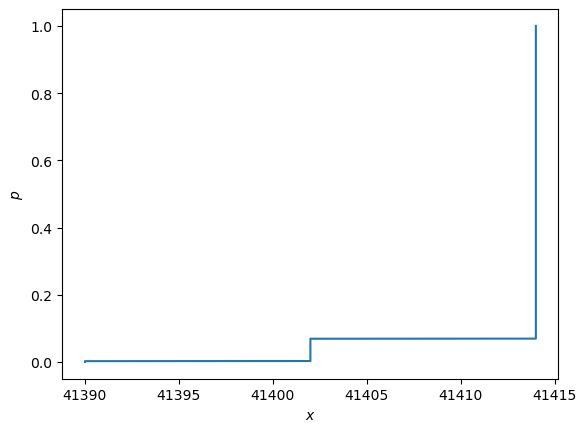

In [61]:
import matplotlib.pyplot as plt
import numpy as np

# create some randomly ddistributed data:
# data = np.random.randn(10000)
data = h2_car_gas_refilling

# sort the data:
data_sorted = np.sort(data)

# calculate the proportional values of samples
p = 1. * np.arange(len(data)) / (len(data) - 1)

# plot the sorted data:
fig = plt.figure()

plt.plot(data_sorted, p)
plt.xlabel('$x$')
plt.ylabel('$p$')

Text(0, 0.5, '$p$')

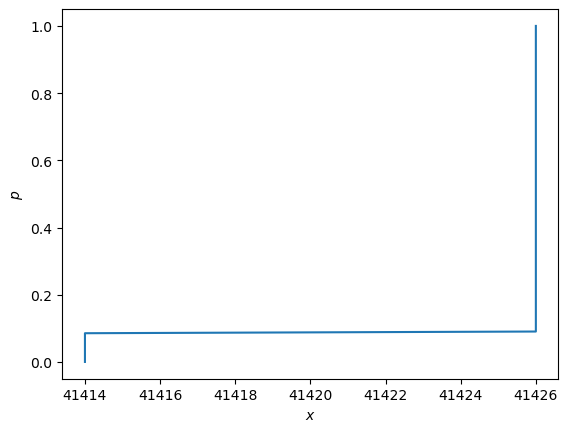

In [62]:
import matplotlib.pyplot as plt
import numpy as np

# create some randomly ddistributed data:
# data = np.random.randn(10000)
data = h2_bus_gas_refilling

# sort the data:
data_sorted = np.sort(data)

# calculate the proportional values of samples
p = 1. * np.arange(len(data)) / (len(data) - 1)

# plot the sorted data:
fig = plt.figure()

plt.plot(data_sorted, p)
plt.xlabel('$x$')
plt.ylabel('$p$')

Text(0, 0.5, '$p$')

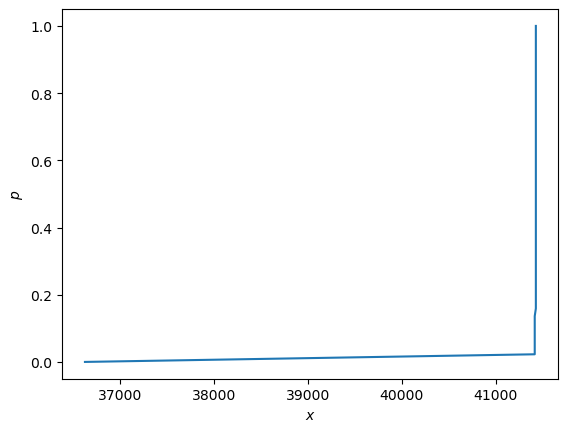

In [63]:
import matplotlib.pyplot as plt
import numpy as np

# create some randomly ddistributed data:
# data = np.random.randn(10000)
data = h2_truck_gas_refilling

# sort the data:
data_sorted = np.sort(data)

# calculate the proportional values of samples
p = 1. * np.arange(len(data)) / (len(data) - 1)

# plot the sorted data:
fig = plt.figure()

plt.plot(data_sorted, p)
plt.xlabel('$x$')
plt.ylabel('$p$')